Import Libraries

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)
print(keras.__version__)

2.1.0
2.2.4-tf


Load built-in MNIST dataset

In [2]:
fashion_mnist = keras.datasets.mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

X_train_full.shape
X_train_full.dtype

X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

Using either OpenCV or Matplotlib, view some random samples

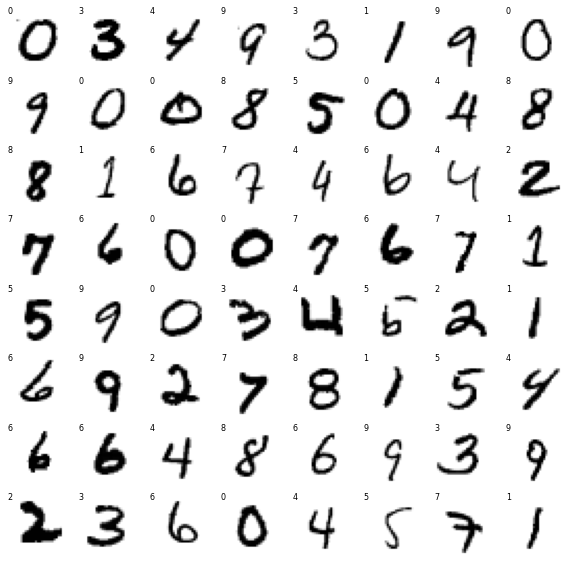

In [3]:
[row, col] = [8, 8] # Don't use ones for row and col

limit = row * col

fig, axs = plt.subplots(int(limit/col), int(col), figsize=(10, 10))

for x in range(limit):
    randomint = np.random.randint(60000)
    test = X_train_full[randomint]
    test = np.reshape(test, (28, 28))
    axs[int(x/col), x%col].imshow(test, cmap="binary")
    axs[int(x/col), x%col].axis("off")
    axs[int(x/col), x%col].text(0.5, 0.5, str(y_train_full[randomint]), fontsize=8, ha='center')

plt.show()